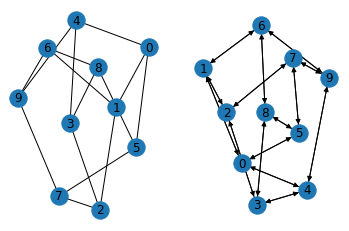

In [3]:
%matplotlib inline
import networkx as nx
import dgl

g_nx = nx.petersen_graph()
g_dgl = dgl.DGLGraph(g_nx)

import matplotlib.pyplot as plt
plt.subplot(121)
nx.draw(g_nx, with_labels=True)
plt.subplot(122)
nx.draw(g_dgl.to_networkx(), with_labels=True)

plt.show()

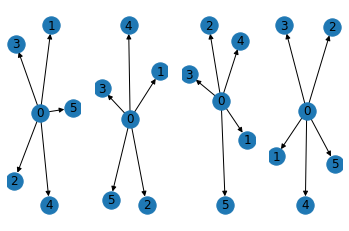

In [13]:
import torch as th
import numpy as np
import scipy.sparse as spp

# Create a star graph from a pair of arrays (using ``numpy.array`` works too).
u = th.tensor([0, 0, 0, 0, 0])
v = th.tensor([1, 2, 3, 4, 5])
star1 = dgl.DGLGraph((u, v))

# Create the same graph in one go! Essentially, if one of the arrays is a scalar,
# the value is automatically broadcasted to match the length of the other array
# -- a feature called *edge broadcasting*.
star2 = dgl.DGLGraph((0, v))

# Create the same graph from a scipy sparse matrix (using ``scipy.sparse.csr_matrix`` works too).
adj = spp.coo_matrix((np.ones(len(u)), (u.numpy(), v.numpy())))
star3 = dgl.DGLGraph(adj)

# Create the same graph from a list of integer pairs.
elist = [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5)]
star4 = dgl.DGLGraph(elist)

plt.subplot(141)
nx.draw(star1.to_networkx(), with_labels=True)
plt.subplot(142)
nx.draw(star2.to_networkx(), with_labels=True)
plt.subplot(143)
nx.draw(star3.to_networkx(), with_labels=True)
plt.subplot(144)
nx.draw(star4.to_networkx(), with_labels=True)

plt.show()

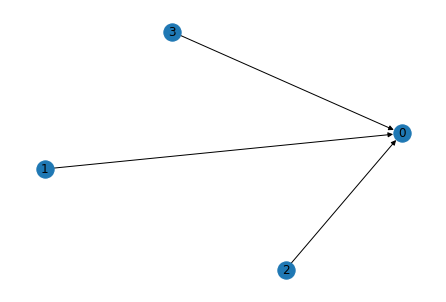

In [40]:
g = dgl.DGLGraph()
g.add_nodes(10)
# A couple edges one-by-one
for i in range(1, 4):
    g.add_edge(i, 0)
# A few more with a paired list
src = list(range(5, 8)); dst = [0]*3
g.add_edges(src, dst)
# finish with a pair of tensors
src = th.tensor([8, 9]); dst = th.tensor([1, 4])
g.add_edges(src, dst)

# Edge broadcasting will do star graph in one go!
g.clear(); g.add_nodes(10)
src = th.tensor(list(range(1, 10)));
g.add_edges(src, 0)

# Visualize the graph.
nx.draw(g.to_networkx(), with_labels=True)
plt.show()

In [27]:
import dgl
import torch as th

x = th.randn(10, 3)
g.ndata['x'] = x

In [28]:
g.ndata['x'][0] = th.zeros(1, 3)
g.ndata['x'][[0, 1, 2]] = th.zeros(3, 3)
g.ndata['x'][th.tensor([0, 1, 2])] = th.randn((3, 3))

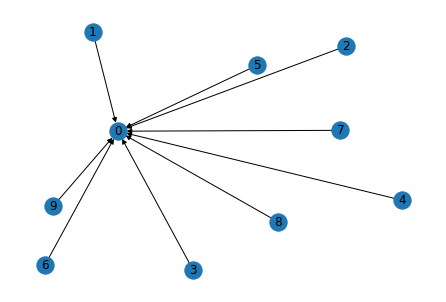

In [38]:
g.edata['w'] = th.randn(9, 2)

# Access edge set with IDs in integer, list, or integer tensor
g.edata['w'][1] = th.randn(1, 2)
g.edata['w'][[0, 1, 2]] = th.zeros(3, 2)
g.edata['w'][th.tensor([0, 1, 2])] = th.zeros(3, 2)
# You can get the edge ids by giving endpoints, which are useful for accessing the features.
g.edata['w'][g.edge_id(1, 0)] = th.ones(1, 2)                   # edge 1 -> 0
g.edata['w'][g.edge_ids([1, 2, 3], [0, 0, 0])] = th.ones(3, 2)  # edges [1, 2, 3] -> 0
# Use edge broadcasting whenever applicable.
g.edata['w'][g.edge_ids([1, 2, 3], 0)] = th.ones(3, 2)          # edges [1, 2, 3] -> 0
nx.draw(g.to_networkx(), with_labels=True)
plt.show()

{'x': Scheme(shape=(4,), dtype=torch.float32)}
{'x': Scheme(shape=(4,), dtype=torch.float32)}


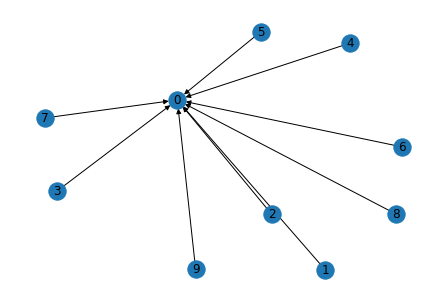

In [36]:
print(g.node_attr_schemes())
g.ndata['x'] = th.zeros((10, 4))
print(g.node_attr_schemes())
nx.draw(g.to_networkx(), with_labels=True, edge_text=g.edata)
plt.show()

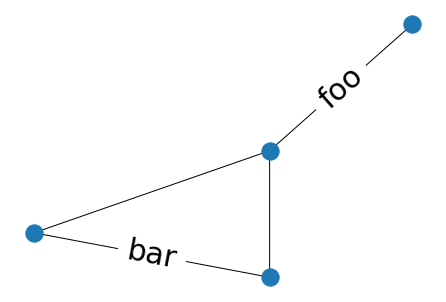

In [39]:
import networkx as nx   

# Sample graph
G = nx.Graph()
G.add_edge(0,1)
G.add_edge(1,2)
G.add_edge(2,3)
G.add_edge(1,3)

labels = {(0,1):'foo', (2,3):'bar'}

pos=nx.spring_layout(G)

nx.draw(G, pos)
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels,font_size=30)

import pylab as plt
plt.show()